In [1]:
from common.module_functions import *

In [14]:
data, X = get_data('common/data/earthquake_data.csv')

In [15]:
from sklearn.cluster import HDBSCAN as hdbscan
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

clusterer = hdbscan(min_cluster_size=10, min_samples=5)
data['cluster'] = clusterer.fit_predict(scaled_features)

In [16]:
data['cluster'].value_counts()

cluster
-1    64
 2    48
 1    25
 4    22
 3    18
 0    13
 7    13
 6    11
 5    10
Name: count, dtype: int64

In [17]:
visualize_3d(data, 'cluster')

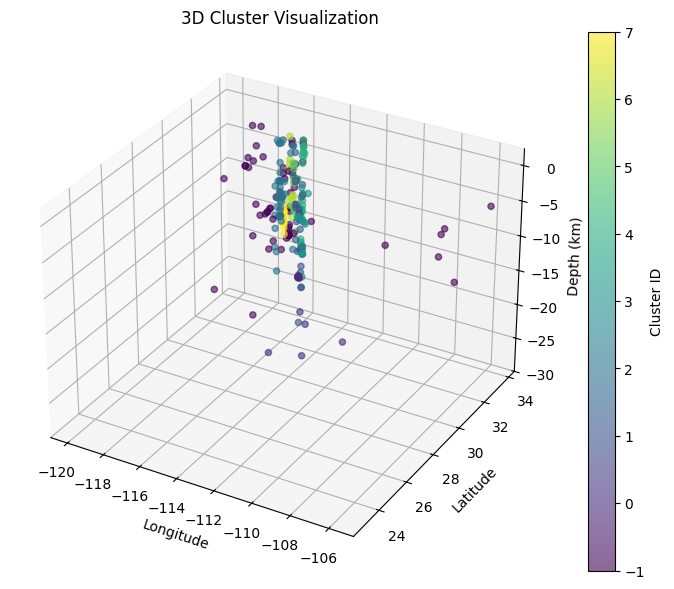

In [18]:
visualize_3d_static(data, 'cluster')

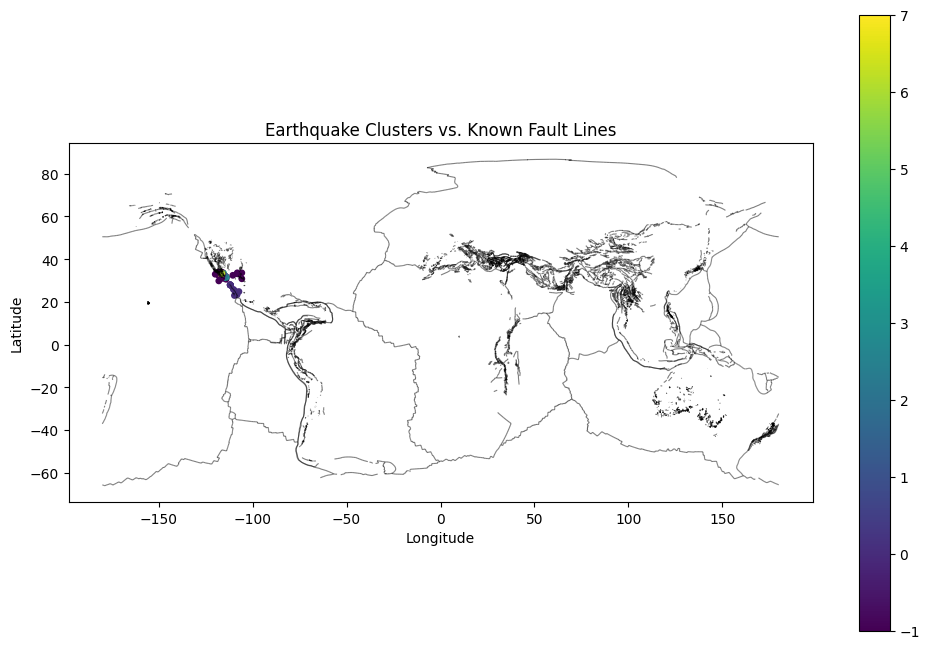

In [19]:
visualize_clusters_on_known_fault_lines(data, crs = "EPSG:4326", cluster_column='cluster')

/var/folders/bz/yzqc11sn1gj3p_f45_fhc_qc0000gn/T/ipykernel_6813/4247735480.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




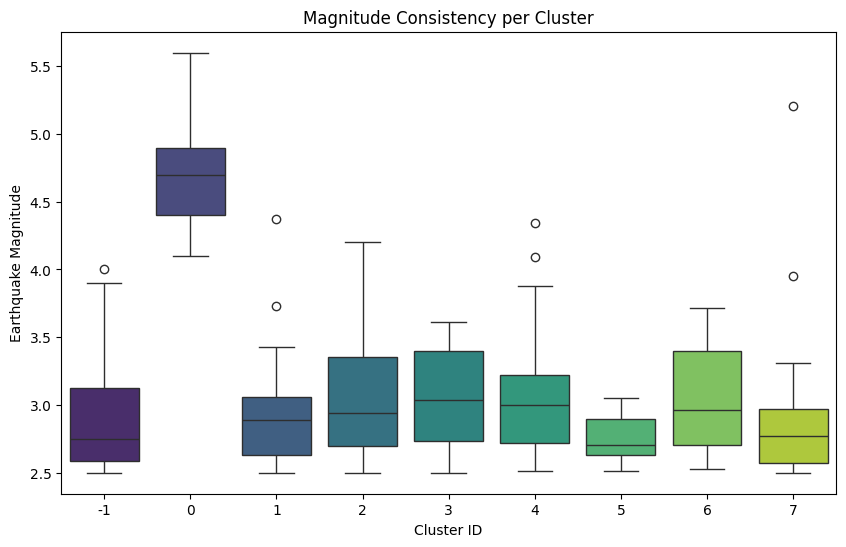

             mean       std  count  coefficient_of_variation
cluster                                                     
-1       2.889858  0.373603     64                  0.129281
 0       4.684615  0.448788     13                  0.095800
 1       2.962000  0.441484     25                  0.149049
 2       3.061253  0.442527     48                  0.144558
 3       3.053333  0.368079     18                  0.120550
 4       3.076643  0.492323     22                  0.160020
 5       2.763000  0.188270     10                  0.068140
 6       3.067222  0.434383     11                  0.141621
 7       3.020769  0.771994     13                  0.255562


In [ ]:
box_plot_by_cluster(data, 'cluster', 'mag')

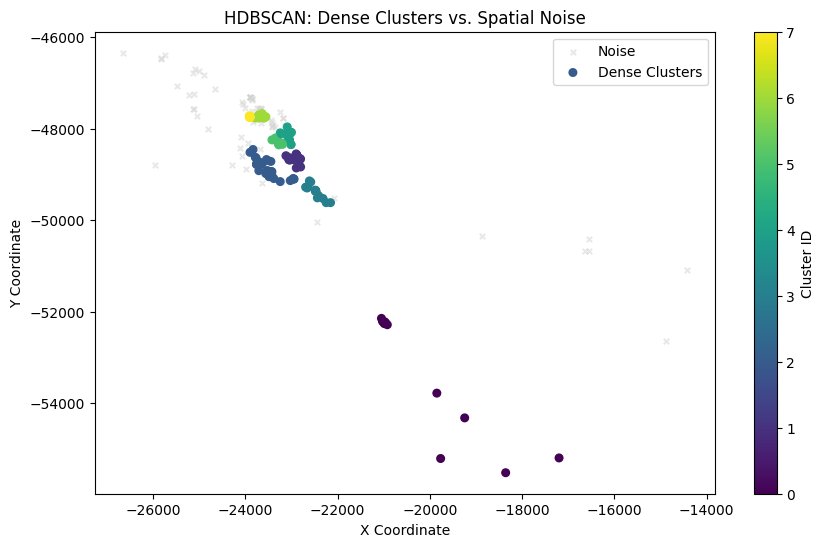

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot the 'Noise' points (Cluster -1) in gray
noise = data[data['cluster'] == -1]
plt.scatter(noise['x'], noise['y'], c='lightgray', label='Noise', alpha=0.5, s=15, marker='x')


clusters = data[data['cluster'] != -1]
scatter = plt.scatter(clusters['x'], clusters['y'], c=clusters['cluster'], 
                    cmap='viridis', label='Dense Clusters', s=30)

plt.colorbar(scatter, label='Cluster ID')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('HDBSCAN: Dense Clusters vs. Spatial Noise')
plt.legend()
plt.show()

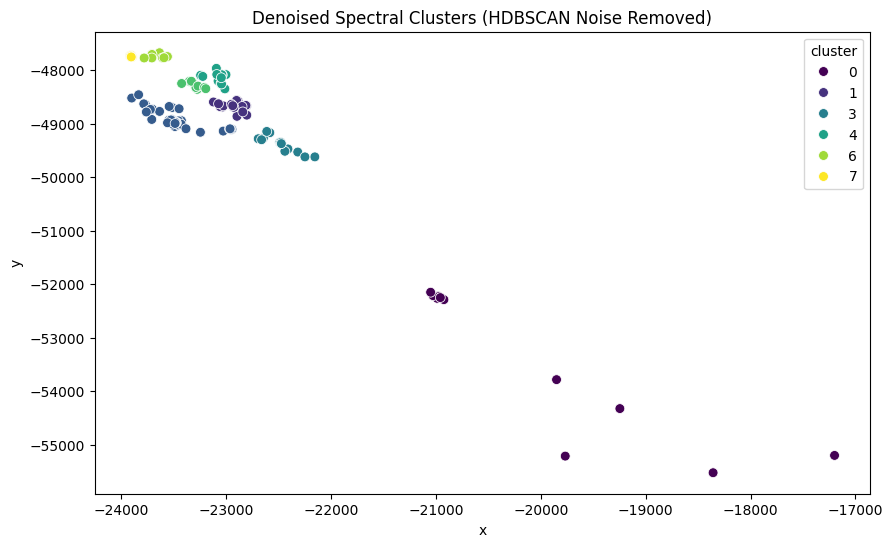

In [23]:
import seaborn as sns

# Create a filtered dataframe of only 'non-noise' points
denoised_data = data[data['cluster'] != -1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data= denoised_data, x='x', y='y', hue='cluster', 
                palette='viridis', s=50, edgecolor='w')

plt.title('Denoised Spectral Clusters (HDBSCAN Noise Removed)')
plt.show()